In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder, OneHotEncoder
#!pip install shap
#from shap import TreeExplainer, initjs, force_plot
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
Data = 'C:/Users/israe/Documents/Github/Dengue_features_train'
dengue_labels_train = pd.read_csv(Data + '/dengue_labels_train.csv')
dengue_features_train = pd.read_csv(Data + '/dengue_features_train.csv')
dengue_features_test = pd.read_csv(Data+ '/dengue_features_test (1).csv')
submission_format = pd.read_csv(Data+ '/submission_format (4).csv')

# Introduction

# Research Background

# Problem Statement(Prediction)

# Features and Observations

# Summary of the Dataset

### METHODOLOGY

In [3]:
#packages
from category_encoders import OrdinalEncoder, OneHotEncoder 
#import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from numpy.random import permutation
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression
#Building model file for app
#from joblib import dump
#dump(h1_model, 'pipeline.joblib', compress = True)

In [4]:
dengue_labels_train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [5]:
dengue_features_train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [6]:
dengue_features_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [7]:
submission_format.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,0
1,sj,2008,19,0
2,sj,2008,20,0
3,sj,2008,21,0
4,sj,2008,22,0


In [8]:
#Concatenate option
#df= pd.concat([(dengue_labels_train),
#          (dengue_features_train ),
#         (dengue_features_test)]
#).set_index('week_start_date')


In [9]:
train_merge = pd.merge(dengue_labels_train,
         dengue_features_train ,
         how='right', on=['city','year', 'weekofyear'])

### 1. WRANGLE THE DATA

In [10]:
def wrangle(df):  
    
    # Drop constant and repeated columns
    df.drop(columns=['ndvi_ne',	'ndvi_nw','ndvi_se'],  inplace=True)
  
    # Drop columns with high % of NaN values
    df.dropna(axis=1, thresh=len(df)*.6, inplace=True)
    df.fillna(0, inplace=True)

    return df

In [11]:
df= wrangle(train_merge)

In [12]:
df.shape

(1456, 22)

In [13]:
df.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
total_cases                              0
week_start_date                          0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

## SPLIT DATA

In [14]:
# Split our feature matrix and target vector
target = 'total_cases'
y = df[target]
X = df.drop(columns=target)

In [15]:
#train -valid split Train before 2010 and test 2010
mask1 = X['year'] <= 2009
mask2 = X['year'] >= 2010
X_train, y_train = X.loc[mask1], y.loc[mask1]
X_val, y_val    =  X.loc[mask2], y.loc[mask2]

### ESTABLISH A BASELINE

In [16]:
from sklearn.metrics import mean_absolute_error
print('Mean total_cases:', y_train.mean())
y_pred = [y_train.mean()] * len(y_train)
print('Baseline MAE:', mean_absolute_error(y_train, y_pred))

Mean total_cases: 24.967832167832167
Baseline MAE: 23.24966502029439


### BUILD THE MODEL

In [17]:
#Module1
from category_encoders import OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import plotly.express as px
gapminder = px.data.gapminder()
#X= gapminder[['city', 'year','weekofyear']]
#y= gapminder['total_cases']

model_lr = make_pipeline(OneHotEncoder(use_cat_names=True),
                         LinearRegression())
model_lr.fit(X_train, y_train)

c:\users\israe\.virtualenvs\github-mpyjtti5\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['city', 'week_start_date'],
                               use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [18]:
coefficients = model_lr.named_steps['linearregression'].coef_
features = model_lr.named_steps['onehotencoder'].get_feature_names()
pd.Series(coefficients, features)

city_sj                       1.658708e+06
city_iq                       1.658691e+06
year                          1.126518e+09
weekofyear                   -8.728798e+06
week_start_date_1990-04-30   -1.206853e+09
                                  ...     
station_avg_temp_c            2.068481e-01
station_diur_temp_rng_c      -1.198763e+00
station_max_temp_c            5.921504e-01
station_min_temp_c            2.329760e-01
station_precip_mm            -8.886337e-03
Length: 1044, dtype: float64

In [19]:
#Module2
#FIT GRADIENT BOOSTING MODEL
from sklearn.ensemble import GradientBoostingRegressor
oe = OrdinalEncoder()
X_train_T = oe.fit_transform(X_train)
X_val_T = oe.transform(X_val)
model_gb =  make_pipeline(OrdinalEncoder(),
                         SimpleImputer(),
                         GradientBoostingRegressor(random_state=42))

model_gb.fit(X_train_T, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

In [20]:
#Module 3 FIT XGRADIENT BOOSTING MODEL
from xgboost import XGBRegressor
oe = OrdinalEncoder()
X_train_T = oe.fit_transform(X_train)
X_val_T = oe.transform(X_val)
model_xg =  make_pipeline(OrdinalEncoder(),
                         SimpleImputer(strategy='median'),
                         XGBRegressor(random_state=42, n_jobs=10))

model_xg.fit(X_train_T, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=10, num_parallel_tree=1, random_state=42,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity

In [21]:
from joblib import dump
dump(model_xg, "pipeline.joblib", compress=True)

['pipeline.joblib']

In [22]:
#Module4
model_rf = make_pipeline(OrdinalEncoder(),
                        SimpleImputer(strategy='median'),
                        RandomForestRegressor(random_state=42))
model_rf.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['city', 'week_start_date'],
                                mapping=[{'col': 'city',
                                          'data_type': dtype('O'),
                                          'mapping': sj     1
iq     2
NaN   -2
dtype: int64},
                                         {'col': 'week_start_date',
                                          'data_type': dtype('O'),
                                          'mapping': 1990-04-30       1
1990-05-07       2
1990-05-14       3
1990-05-21       4
1990-05-28       5
              ... 
2009-12-03    1020
2009-12-10    1021
2009-12-17    1022
2009-12-24    1023
NaN             -2
Length: 1024, dtype: int64}])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [23]:
#module5
model_dt = make_pipeline(OrdinalEncoder(),
                        SimpleImputer(strategy='median'),
                        DecisionTreeRegressor(random_state=42))
model_dt.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['city', 'week_start_date'],
                                mapping=[{'col': 'city',
                                          'data_type': dtype('O'),
                                          'mapping': sj     1
iq     2
NaN   -2
dtype: int64},
                                         {'col': 'week_start_date',
                                          'data_type': dtype('O'),
                                          'mapping': 1990-04-30       1
1990-05-07       2
1990-05-14       3
1990-05-21       4
1990-05-28       5
              ... 
2009-12-03    1020
2009-12-10    1021
2009-12-17    1022
2009-12-24    1023
NaN             -2
Length: 1024, dtype: int64}])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [24]:
#Module 6
from sklearn.linear_model import Ridge
model_r =make_pipeline(
          OrdinalEncoder(),
          SimpleImputer(),
          Ridge()
)
model_r.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['city', 'week_start_date'],
                                mapping=[{'col': 'city',
                                          'data_type': dtype('O'),
                                          'mapping': sj     1
iq     2
NaN   -2
dtype: int64},
                                         {'col': 'week_start_date',
                                          'data_type': dtype('O'),
                                          'mapping': 1990-04-30       1
1990-05-07       2
1990-05-14       3
1990-05-21       4
1990-05-28       5
              ... 
2009-12-03    1020
2009-12-10    1021
2009-12-17    1022
2009-12-24    1023
NaN             -2
Length: 1024, dtype: int64}])),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

### CHECK THE METRICS

In [25]:
X_val

,city,year,weekofyear,week_start_date,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1430,iq,2010,53,2010-01-01,0.000000,0.00,0.000000,0.000000,0.000000,0.0,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1431,iq,2010,1,2010-01-08,0.135471,27.04,299.264286,300.521429,294.530000,308.6,...,8.50,78.271429,27.04,16.127143,11.100000,28.600000,12.300000,35.1,21.8,0.0
1432,iq,2010,2,2010-01-15,0.167529,32.99,298.297143,299.935714,296.147143,308.0,...,144.60,89.807143,32.99,17.758571,9.157143,27.833333,11.300000,34.2,22.1,15.0
1433,iq,2010,3,2010-01-22,0.302786,19.04,298.925714,300.457143,296.380000,307.8,...,31.20,87.641429,19.04,18.001429,8.628571,28.966667,11.266667,35.2,22.5,0.8
1434,iq,2010,4,2010-01-29,0.261286,138.51,298.291429,299.614286,296.560000,308.3,...,65.76,91.798571,138.51,18.192857,7.685714,27.800000,10.520000,35.3,22.4,166.0
1435,iq,2010,5,2010-02-05,0.139343,47.31,298.754286,300.342857,296.837143,306.1,...,95.83,90.648571,47.31,18.522857,8.314286,27.800000,9.266667,34.2,22.0,62.3
1436,iq,2010,6,2010-02-12,0.238871,78.25,298.251429,299.678571,297.568571,306.2,...,172.70,96.515714,78.25,19.345714,6.328571,27.000000,8.300000,33.2,22.9,14.5
1437,iq,2010,7,2010-02-19,0.266671,32.19,299.648571,300.950000,297.090000,309.2,...,54.20,88.365714,32.19,18.857143,9.414286,27.300000,11.800000,35.5,21.4,60.9
1438,iq,2010,8,2010-02-26,0.333314,84.67,298.917143,300.485714,297.928571,308.2,...,288.40,94.915714,84.67,19.772857,8.171429,28.020000,10.360000,35.4,21.4,29.9
1439,iq,2010,9,2010-03-05,0.142767,80.58,298.337143,299.664286,297.917143,306.3,...,144.98,97.700000,80.58,19.754286,6.242857,28.500000,9.900000,35.4,21.2,9.9


In [26]:
#Mean_Absolute_Error
from sklearn.metrics import mean_absolute_error

print('Linear Regression Validity MAE:', mean_absolute_error(y_val, model_lr.predict(X_val)))
print('DecisionTree Validity MAE:', mean_absolute_error(y_val, model_dt.predict(X_val)))
print('Random Forest Validity MAE:', mean_absolute_error(y_val, model_rf.predict(X_val)))
print('Gradient Boost Validity MAE:', mean_absolute_error(y_val, model_gb.predict(X_val_T)))
print('Ridge Regression Validity MAE:', mean_absolute_error(y_val, model_r.predict(X_val)))
print('XGradient Boost Validity MAE:',  mean_absolute_error(y_val, model_xg.predict(X_val_T)))

Linear Regression Validity MAE: 23767420260.330624
DecisionTree Validity MAE: 31.346153846153847
Random Forest Validity MAE: 43.32961538461538
Gradient Boost Validity MAE: 14.851252481341401
Ridge Regression Validity MAE: 248.8582420038961
XGradient Boost Validity MAE: 10.734972330240103


In [27]:
from sklearn.metrics import r2_score
print('Linear Regression R2 score:',r2_score(y_val,model_lr.predict(X_val)) )
print('Decision Tree R2 score:',r2_score(y_val,model_dt.predict(X_val)) )
print('Random Forest R2 score:',r2_score(y_val,model_rf.predict(X_val)) )
print('Gradient Boost R2 score:',r2_score(y_val,model_gb.predict(X_val_T)) )
print('Ridge Regression R2 score:',r2_score(y_val,model_r.predict(X_val)))
print('XGradient Boost R2 score:',r2_score(y_val,model_xg.predict(X_val_T)) )

Linear Regression R2 score: -2.1031637521178292e+19
Decision Tree R2 score: -46.118466707055134
Random Forest R2 score: -81.71323638266233
Gradient Boost R2 score: -14.461081619750503
Ridge Regression R2 score: -2310.054774470618
XGradient Boost R2 score: -5.359716612358408


### TUNE THE MODEL

In [28]:

params = {
    'simpleimputer__strategy': ['mean', 'median'],
    'randomforestregressor__n_estimators': [200,400,600,800],
    'randomforestregressor__max_depth': range(5, 10, 5)
}

model_gs = GridSearchCV(
    model_rf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

model_gs.fit(X_train, y_train);

Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\users\israe\.virtualenvs\github-mpyjtti5\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [29]:
model_gs.best_params_

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__n_estimators': 400,
 'simpleimputer__strategy': 'mean'}

In [30]:
model_gs.best_estimator_

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['city', 'week_start_date'],
                                mapping=[{'col': 'city',
                                          'data_type': dtype('O'),
                                          'mapping': sj     1
iq     2
NaN   -2
dtype: int64},
                                         {'col': 'week_start_date',
                                          'data_type': dtype('O'),
                                          'mapping': 1990-04-30       1
1990-05-07       2
1990-05-14       3
1990-05-21       4
1990-05-28       5
              ... 
2009-12-03    1020
2009-12-10    1021
2009-12-17    1022
2009-12-24    1023
NaN             -2
Length: 1024, dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=5, n_estimators=400,
                                       random_state=42))])

In [31]:
model_gs.best_score_

-0.1009052182842592

In [32]:
model_rs = RandomizedSearchCV(
    model_rf,
    param_distributions=params,
    n_iter=3,
    cv=5,
    n_jobs=-1,
    verbose=1
)

model_rs.fit(X_train, y_train);

Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\users\israe\.virtualenvs\github-mpyjtti5\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [33]:
model_rs.best_params_

{'simpleimputer__strategy': 'mean',
 'randomforestregressor__n_estimators': 400,
 'randomforestregressor__max_depth': 5}

In [34]:
model_rs.best_estimator_

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['city', 'week_start_date'],
                                mapping=[{'col': 'city',
                                          'data_type': dtype('O'),
                                          'mapping': sj     1
iq     2
NaN   -2
dtype: int64},
                                         {'col': 'week_start_date',
                                          'data_type': dtype('O'),
                                          'mapping': 1990-04-30       1
1990-05-07       2
1990-05-14       3
1990-05-21       4
1990-05-28       5
              ... 
2009-12-03    1020
2009-12-10    1021
2009-12-17    1022
2009-12-24    1023
NaN             -2
Length: 1024, dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=5, n_estimators=400,
                                       random_state=42))])

In [35]:
model_rs.best_score_

-0.1009052182842592

 The results of the Model tuned
1.Tune
model_rs.best_score_ = 0.5418745474099159
model_gs.best_score_ = 0.5454350159011446
2. 
model_rs_best_score = 0.5424276449639854
model_gs_best_score = 0.5454350159011446
3.
model_gs_best_score = 0.5457176881996951
model_rs_best_score = 0.5424276449639854
4.
model_gs_best_score = 0.5521844300560075
model_rs_best_score = 0.5457176881996951
5.
model_gs_best_score = 0.5522634881621368
model_rs_best_score = 0.5521844300560075

## Check the metrics after Tuning the model

In [36]:
#Mean_Absolute_Error
from sklearn.metrics import mean_absolute_error

print('Linear Regression Validity MAE:', mean_absolute_error(y_val, model_lr.predict(X_val)))
print('DecisionTree Validity MAE:', mean_absolute_error(y_val, model_dt.predict(X_val)))
print('Random Forest Validity MAE:', mean_absolute_error(y_val, model_rf.predict(X_val)))
print('Gradient Boost Validity MAE:', mean_absolute_error(y_val, model_gb.predict(X_val_T)))
print('Ridge Regression Validity MAE:', mean_absolute_error(y_val, model_r.predict(X_val)))
print('XGradient Boost Validity MAE:',  mean_absolute_error(y_val, model_xg.predict(X_val_T)))

Linear Regression Validity MAE: 23767420260.330624
DecisionTree Validity MAE: 31.346153846153847
Random Forest Validity MAE: 43.32961538461538
Gradient Boost Validity MAE: 14.851252481341401
Ridge Regression Validity MAE: 248.8582420038961
XGradient Boost Validity MAE: 10.734972330240103


In [37]:
from sklearn.metrics import r2_score
print('Linear Regression R2 score:',r2_score(y_val,model_lr.predict(X_val)) )
print('Decision Tree R2 score:',r2_score(y_val,model_dt.predict(X_val)) )
print('Random Forest R2 score:',r2_score(y_val,model_rf.predict(X_val)) )
print('Gradient Boost R2 score:',r2_score(y_val,model_gb.predict(X_val_T)) )
print('Ridge Regression R2 score:',r2_score(y_val,model_r.predict(X_val)))
print('XGradient Boost R2 score:',r2_score(y_val,model_xg.predict(X_val_T)) )

Linear Regression R2 score: -2.1031637521178292e+19
Decision Tree R2 score: -46.118466707055134
Random Forest R2 score: -81.71323638266233
Gradient Boost R2 score: -14.461081619750503
Ridge Regression R2 score: -2310.054774470618
XGradient Boost R2 score: -5.359716612358408


### RESULTS OF THE FINIDINGS

#Feature Importances

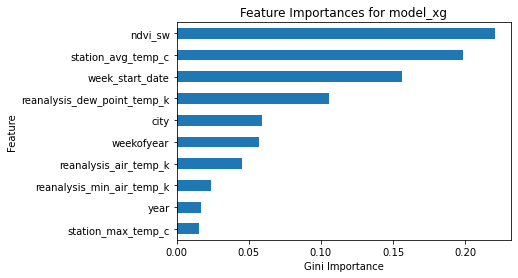

In [38]:
importances = model_xg.named_steps['xgbregressor'].feature_importances_
features = X_train.columns

feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.tail(10).plot(kind='barh')
plt.xlabel('Gini Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for model_xg');

###Permutation Importances

In [39]:
perm_imp = permutation_importance(model_xg,
                                  X_val_T, 
                                  y_val, 
                                  n_jobs=10, 
                                  random_state=42)

exception calling callback for <Future at 0x1a821abd940 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\users\israe\.virtualenvs\github-mpyjtti5\lib\site-packages\joblib\externals\loky\process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "c:\users\israe\appdata\local\programs\python\python39\lib\multiprocessing\queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  File "c:\users\israe\.virtualenvs\github-mpyjtti5\lib\site-packages\xgboost\__init__.py", line 9, in <module>
    from .core import DMatrix, DeviceQuantileDMatrix, Booster
  File "c:\users\israe\.virtualenvs\github-mpyjtti5\lib\site-packages\xgboost\core.py", line 174, in <module>
    _LIB = _load_lib()
  File "c:\users\israe\.virtualenvs\github-mpyjtti5\lib\site-packages\xgboost\core.py", line 157, in _load_lib
    raise XGBoostError(
xgboost.core

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
perm_imp['importances_mean']

In [ ]:
data = pd.DataFrame({'importances_mean': perm_imp['importances_mean']}, index = X_val.columns)

In [ ]:
data['importances_mean'].sort_values().tail(10).plot(kind='barh')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for model_xg');

In [ ]:
#Using a Partial Dependency Plot 
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'weekofyear'

isolate = pdp_isolate(
          model=model_xg,
          dataset=oe.transform(X_val),
          model_features=oe.transform(X_val).columns,
          feature=feature
)

pdp_plot(isolate, feature_name=feature)

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'station_avg_temp_c'

isolate = pdp_isolate(
          model=model_xg,
          dataset=oe.transform(X_val),
          model_features=oe.transform(X_val).columns,
          feature=feature
)

pdp_plot(isolate, feature_name=feature)

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'ndvi_sw'

isolate = pdp_isolate(
          model=model_xg,
          dataset=oe.transform(X_val),
          model_features=oe.transform(X_val).columns,
          feature=feature
)

pdp_plot(isolate, feature_name=feature)

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'reanalysis_max_air_temp_k'

isolate = pdp_isolate(
          model=model_xg,
          dataset=oe.transform(X_val),
          model_features=oe.transform(X_val).columns,
          feature=feature
)

pdp_plot(isolate, feature_name=feature)

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'reanalysis_dew_point_temp_k'

isolate = pdp_isolate(
          model=model_xg,
          dataset=oe.transform(X_val),
          model_features=oe.transform(X_val).columns,
          feature=feature
)

pdp_plot(isolate, feature_name=feature)

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'reanalysis_avg_temp_k'

isolate = pdp_isolate(
          model=model_xg,
          dataset=oe.transform(X_val),
          model_features=oe.transform(X_val).columns,
          feature=feature
)

pdp_plot(isolate, feature_name=feature)

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'week_start_date'

isolate = pdp_isolate(
          model=model_xg,
          dataset=oe.transform(X_val),
          model_features=oe.transform(X_val).columns,
          feature=feature
)

pdp_plot(isolate, feature_name=feature)

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'reanalysis_relative_humidity_percent'

isolate = pdp_isolate(
          model=model_xg,
          dataset=oe.transform(X_val),
          model_features=oe.transform(X_val).columns,
          feature=feature
)

pdp_plot(isolate, feature_name=feature)

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'reanalysis_specific_humidity_g_per_kg'

isolate = pdp_isolate(
          model=model_xg,
          dataset=oe.transform(X_val),
          model_features=oe.transform(X_val).columns,
          feature=feature
)

pdp_plot(isolate, feature_name=feature)

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'reanalysis_min_air_temp_k'

isolate = pdp_isolate(
          model=model_xg,
          dataset=oe.transform(X_val),
          model_features=oe.transform(X_val).columns,
          feature=feature
)

pdp_plot(isolate, feature_name=feature)

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

feature = ['weekofyear','station_avg_temp_c']

interact = pdp_interact(
          model=model_xg,
          dataset=oe.transform(X_val),
          model_features=oe.transform(X_val).columns,
          features=feature
)

pdp_interact_plot(interact, plot_type='grid', feature_names=feature)

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

feature = ['ndvi_sw','station_avg_temp_c']

interact = pdp_interact(
          model=model_xg,
          dataset=oe.transform(X_val),
          model_features=oe.transform(X_val).columns,
          features=feature
)

pdp_interact_plot(interact, plot_type='grid', feature_names=feature)

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

feature = ['week_start_date','station_avg_temp_c']

interact = pdp_interact(
          model=model_xg,
          dataset=oe.transform(X_val),
          model_features=oe.transform(X_val).columns,
          features=feature
)

pdp_interact_plot(interact, plot_type='grid', feature_names=feature)

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

feature = ['weekofyear','reanalysis_relative_humidity_percent']

interact = pdp_interact(
          model=model_xg,
          dataset=oe.transform(X_val),
          model_features=oe.transform(X_val).columns,
          features=feature
)

pdp_interact_plot(interact, plot_type='grid', feature_names=feature)

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

feature = ['weekofyear','ndvi_sw']

interact = pdp_interact(
          model=model_xg,
          dataset=oe.transform(X_val),
          model_features=oe.transform(X_val).columns,
          features=feature
)

pdp_interact_plot(interact, plot_type='grid', feature_names=feature)

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

feature = ['weekofyear','reanalysis_max_air_temp_k']

interact = pdp_interact(
          model=model_xg,
          dataset=oe.transform(X_val),
          model_features=oe.transform(X_val).columns,
          features=feature
)

pdp_interact_plot(interact, plot_type='grid', feature_names=feature)

In [ ]:
#Using shap plot
# Grab a single observation from our test data
row = X_train.iloc[[128]]
row

In [ ]:
model_xg.predict(oe.transform(row))

In [ ]:
!pip install shap
from shap import TreeExplainer, initjs, force_plot

explainer = TreeExplainer(model_xg)

initjs()

force_plot(
    base_value=explainer.expected_value,
    shap_values=explainer.shap_values(oe.transform(row)),
    features=row
)

### Submission 

In [ ]:
features_list = X_val.columns.tolist()

In [ ]:
X_test_T = oe.transform(X_test[features_list])

In [ ]:
y_pred = model_xg.predict(X_test_T)


In [ ]:
y_pred = y_pred.astype(int)

In [ ]:
y_pred

In [ ]:
submission_format['total_cases'] = y_pred

In [ ]:
submission_format.to_csv('submission_aikulola.csv',index=False)